<a href="https://colab.research.google.com/github/Junying123/streamlit-breast-cancer-predict/blob/main/WIA3014_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study Breast Cancer

*   Understand the Dataset & cleanup (if required).
*   Build classification models to predict whether the cancer type is Malignant or Benign.
*   Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms

# Task 1
* 1.1. Import the dataset and explore the data.
* 1.2. Provide some statistics base on the given dataset. Indicate missing, duplications, and extreme/unrealistic values if there are any.

In [ ]:
import io
import requests
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
DATA_DIR = "/content/gdrive/MyDrive/WIA3014 PAI/breast-cancer.csv"
Cancer_df = pd.read_csv (DATA_DIR, header=0)

In [ ]:
print("Number of rows: {}".format(len(Cancer_df)))

print("Number of columns: {}".format(len(Cancer_df.columns)))
print()

print("Listing all columns: ")
print(Cancer_df.head())
print()

print("Display basic statistic of all columns: ")
print(Cancer_df.describe())
print()

print("Display basic information of the columns: ")
print(Cancer_df.info())

Number of rows: 526
Number of columns: 32

Listing all columns: 
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84358402         M        20.29         14.34          135.10     1297.0   
4    843786         M        12.45         15.70           82.57      477.1   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.10030           0.13280          0.1980              0.10430   
4          0.12780           0.17000          0.1578              0.08089  

In [ ]:
# Find how many missing values there are in the columns.
print("Missing value: ")
print (Cancer_df.isnull().sum())
print()

print("Duplicated value: ")
print (Cancer_df.duplicated().sum())
print()

print("Extreme value: ")
extreme_values = ((Cancer_df.select_dtypes(include=['float64', 'int64']) - Cancer_df.describe().T['mean']) / Cancer_df.describe().T['std']).abs() > 4
extreme_values.sum()

Missing value: 
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Duplicated value: 
0

Extreme value: 


id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           1
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     1
radius_se                  4
texture_se                 0
perimeter_se               3
area_se                    3
smoothness_se              2
compactness_se             1
concavity_se               2
concave points_se          2
symmetry_se                2
fractal_dimension_se       3
radius_worst               0
texture_worst              1
perimeter_worst            0
area_worst                 2
smoothness_worst           1
compactness_worst          1
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Task 2
* 2.1. Clean the dataset from missing values, duplications, and extreme unrealistic values. Give why you choose to remove the datum instead of replacing it or vice versa.
* 2.2. Attach the clean dataset to the final report.

In [ ]:
# Identify numerical columns in Cancer_df
numerical_columns = Cancer_df.select_dtypes(include=['float64', 'int64']).columns

# Filter these columns to find those with missing values
numerical_columns_with_missing_values = [col for col in numerical_columns if Cancer_df[col].isnull().any()]

# Calculating and printing the mean for each numerical column with missing values (rounded to 3 decimal places)
means_for_imputation = {column: round(Cancer_df[column].mean(), 3) for column in numerical_columns_with_missing_values}

# Display the calculated means
for column, mean_value in means_for_imputation.items():
    print(f"Mean for {column}: {mean_value}")

In [ ]:
# Impute missing values with the rounded mean of each column
for column, mean_value in means_for_imputation.items():
    Cancer_df[column].fillna(mean_value, inplace=True)

# Checking if all missing values have been filled
null_values_after_imputation = Cancer_df.isnull().sum()

print("\nNull values after imputation:")
# Print the null values after imputation to verify
print(null_values_after_imputation)


Null values after imputation:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
# Remove missing values
print("Before remove missing values: [{} rows x {} col]".format(Cancer_df.shape[0],Cancer_df.shape[1] ))

Cancer_df = (Cancer_df.dropna())
print("After remove missing values: [{} rows x {} col]".format(Cancer_df.shape[0],Cancer_df.shape[1] ))
print (Cancer_df.isnull().sum())

# Remove extreme values
extreme_value_thresholds = 4
extreme_value_mask = ((Cancer_df.select_dtypes(include=['float64', 'int64']) - Cancer_df.describe().T['mean']) / Cancer_df.describe().T['std']).abs() > extreme_value_thresholds
rows_to_remove = extreme_value_mask.any(axis=1)
data_cleaned = Cancer_df[~rows_to_remove]

print()
print(f"After removing extreme/unrealistic values: {data_cleaned.shape[0]} rows (Before missing values removal: {Cancer_df.shape[0]} rows)")

Before remove missing values: [526 rows x 32 col]
After remove missing values: [526 rows x 32 col]
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fr

In [ ]:
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 0 to 525
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       507 non-null    int64  
 1   diagnosis                507 non-null    object 
 2   radius_mean              507 non-null    float64
 3   texture_mean             507 non-null    float64
 4   perimeter_mean           507 non-null    float64
 5   area_mean                507 non-null    float64
 6   smoothness_mean          507 non-null    float64
 7   compactness_mean         507 non-null    float64
 8   concavity_mean           507 non-null    float64
 9   concave points_mean      507 non-null    float64
 10  symmetry_mean            507 non-null    float64
 11  fractal_dimension_mean   507 non-null    float64
 12  radius_se                507 non-null    float64
 13  texture_se               507 non-null    float64
 14  perimeter_se             5

In [ ]:
# Saving the cleaned dataset
save_path = "/content/gdrive/MyDrive/WIA3014 PAI/breast-cancer.csv"
data_cleaned.to_csv(save_path, index=False)

save_path

'/content/gdrive/MyDrive/WIA3014 PAI/breast-cancer.csv'

In [ ]:
data_cleaned['diagnosis'].value_counts()

B    332
M    175
Name: diagnosis, dtype: int64

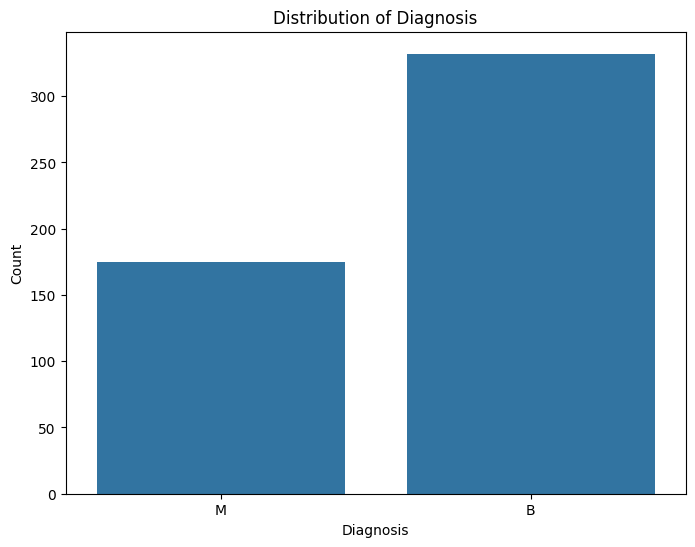

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=data_cleaned)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

#Task 3
* 3.1. Create a correlation matrix. Interpret the correlation coefficients as displayed on the matrix. The interpretation is to answer the following question:
* 3.2. What correlations exist?
* 3.3. How strong are they?

In [ ]:
# label encoding(convert the value of M and B into 1 and 0)
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
data_cleaned.iloc[:,1]=labelencoder_Y.fit_transform(data_cleaned.iloc[:,1].values)

data_cleaned.head()

<ipython-input-13-08215b8af6d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.iloc[:,1]=labelencoder_Y.fit_transform(data_cleaned.iloc[:,1].values)
<ipython-input-13-08215b8af6d8>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_cleaned.iloc[:,1]=labelencoder_Y.fit_transform(data_cleaned.iloc[:,1].values)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


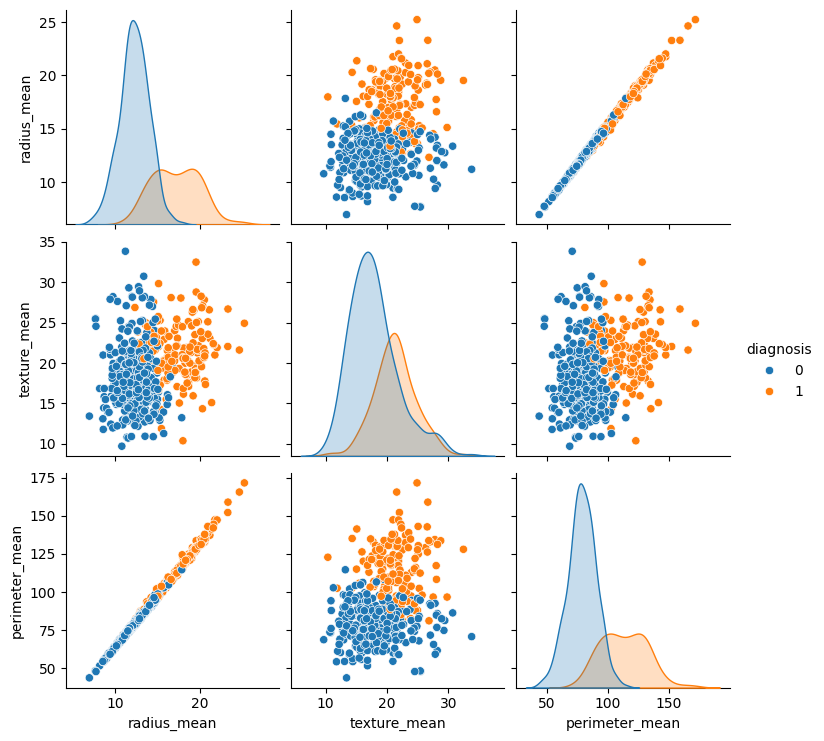

In [ ]:
sns.pairplot(data_cleaned.iloc[:,1:5],hue="diagnosis")

**Correlation**

In [ ]:
# the correlation
data_cleaned.iloc[:,1:32].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.736114,0.392382,0.749167,0.734878,0.332885,0.618111,0.751797,0.785783,0.317720,...,0.789112,0.431488,0.796171,0.772215,0.416676,0.605445,0.695585,0.786670,0.404711,0.361540
radius_mean,0.736114,1.000000,0.300102,0.998171,0.991554,0.144361,0.558498,0.730686,0.823790,0.146036,...,0.971336,0.280131,0.966042,0.950351,0.123231,0.478962,0.583071,0.762906,0.187056,0.090455
texture_mean,0.392382,0.300102,1.000000,0.305899,0.310523,-0.038495,0.229713,0.307588,0.275167,0.056864,...,0.324638,0.914006,0.330654,0.328245,0.066932,0.255241,0.295231,0.266267,0.088472,0.110839
perimeter_mean,0.749167,0.998171,0.305899,1.000000,0.990530,0.179117,0.603836,0.765096,0.849709,0.173957,...,0.972371,0.286415,0.971922,0.952006,0.155061,0.518636,0.616883,0.788104,0.207762,0.132059
area_mean,0.734878,0.991554,0.310523,0.990530,1.000000,0.144228,0.552712,0.736671,0.827784,0.154114,...,0.969645,0.285240,0.964657,0.964660,0.130778,0.462948,0.578957,0.750815,0.179808,0.091367
smoothness_mean,0.332885,0.144361,-0.038495,0.179117,0.144228,1.000000,0.642692,0.496608,0.532715,0.522003,...,0.192384,0.012854,0.214520,0.188977,0.802873,0.432900,0.397322,0.475320,0.334048,0.496805
compactness_mean,0.618111,0.558498,0.229713,0.603836,0.552712,0.642692,1.000000,0.885077,0.843335,0.526576,...,0.595480,0.236877,0.646175,0.581401,0.578013,0.879028,0.817041,0.828349,0.460025,0.694216
concavity_mean,0.751797,0.730686,0.307588,0.765096,0.736671,0.496608,0.885077,1.000000,0.940902,0.422667,...,0.751734,0.313749,0.788766,0.745038,0.479600,0.781889,0.889997,0.883994,0.376548,0.528280
concave points_mean,0.785783,0.823790,0.275167,0.849709,0.827784,0.532715,0.843335,0.940902,1.000000,0.415335,...,0.837674,0.277285,0.860505,0.828065,0.462351,0.690174,0.769184,0.913125,0.350845,0.409649
symmetry_mean,0.317720,0.146036,0.056864,0.173957,0.154114,0.522003,0.526576,0.422667,0.415335,1.000000,...,0.188377,0.066529,0.211756,0.189520,0.406994,0.408520,0.365138,0.371387,0.672243,0.384862


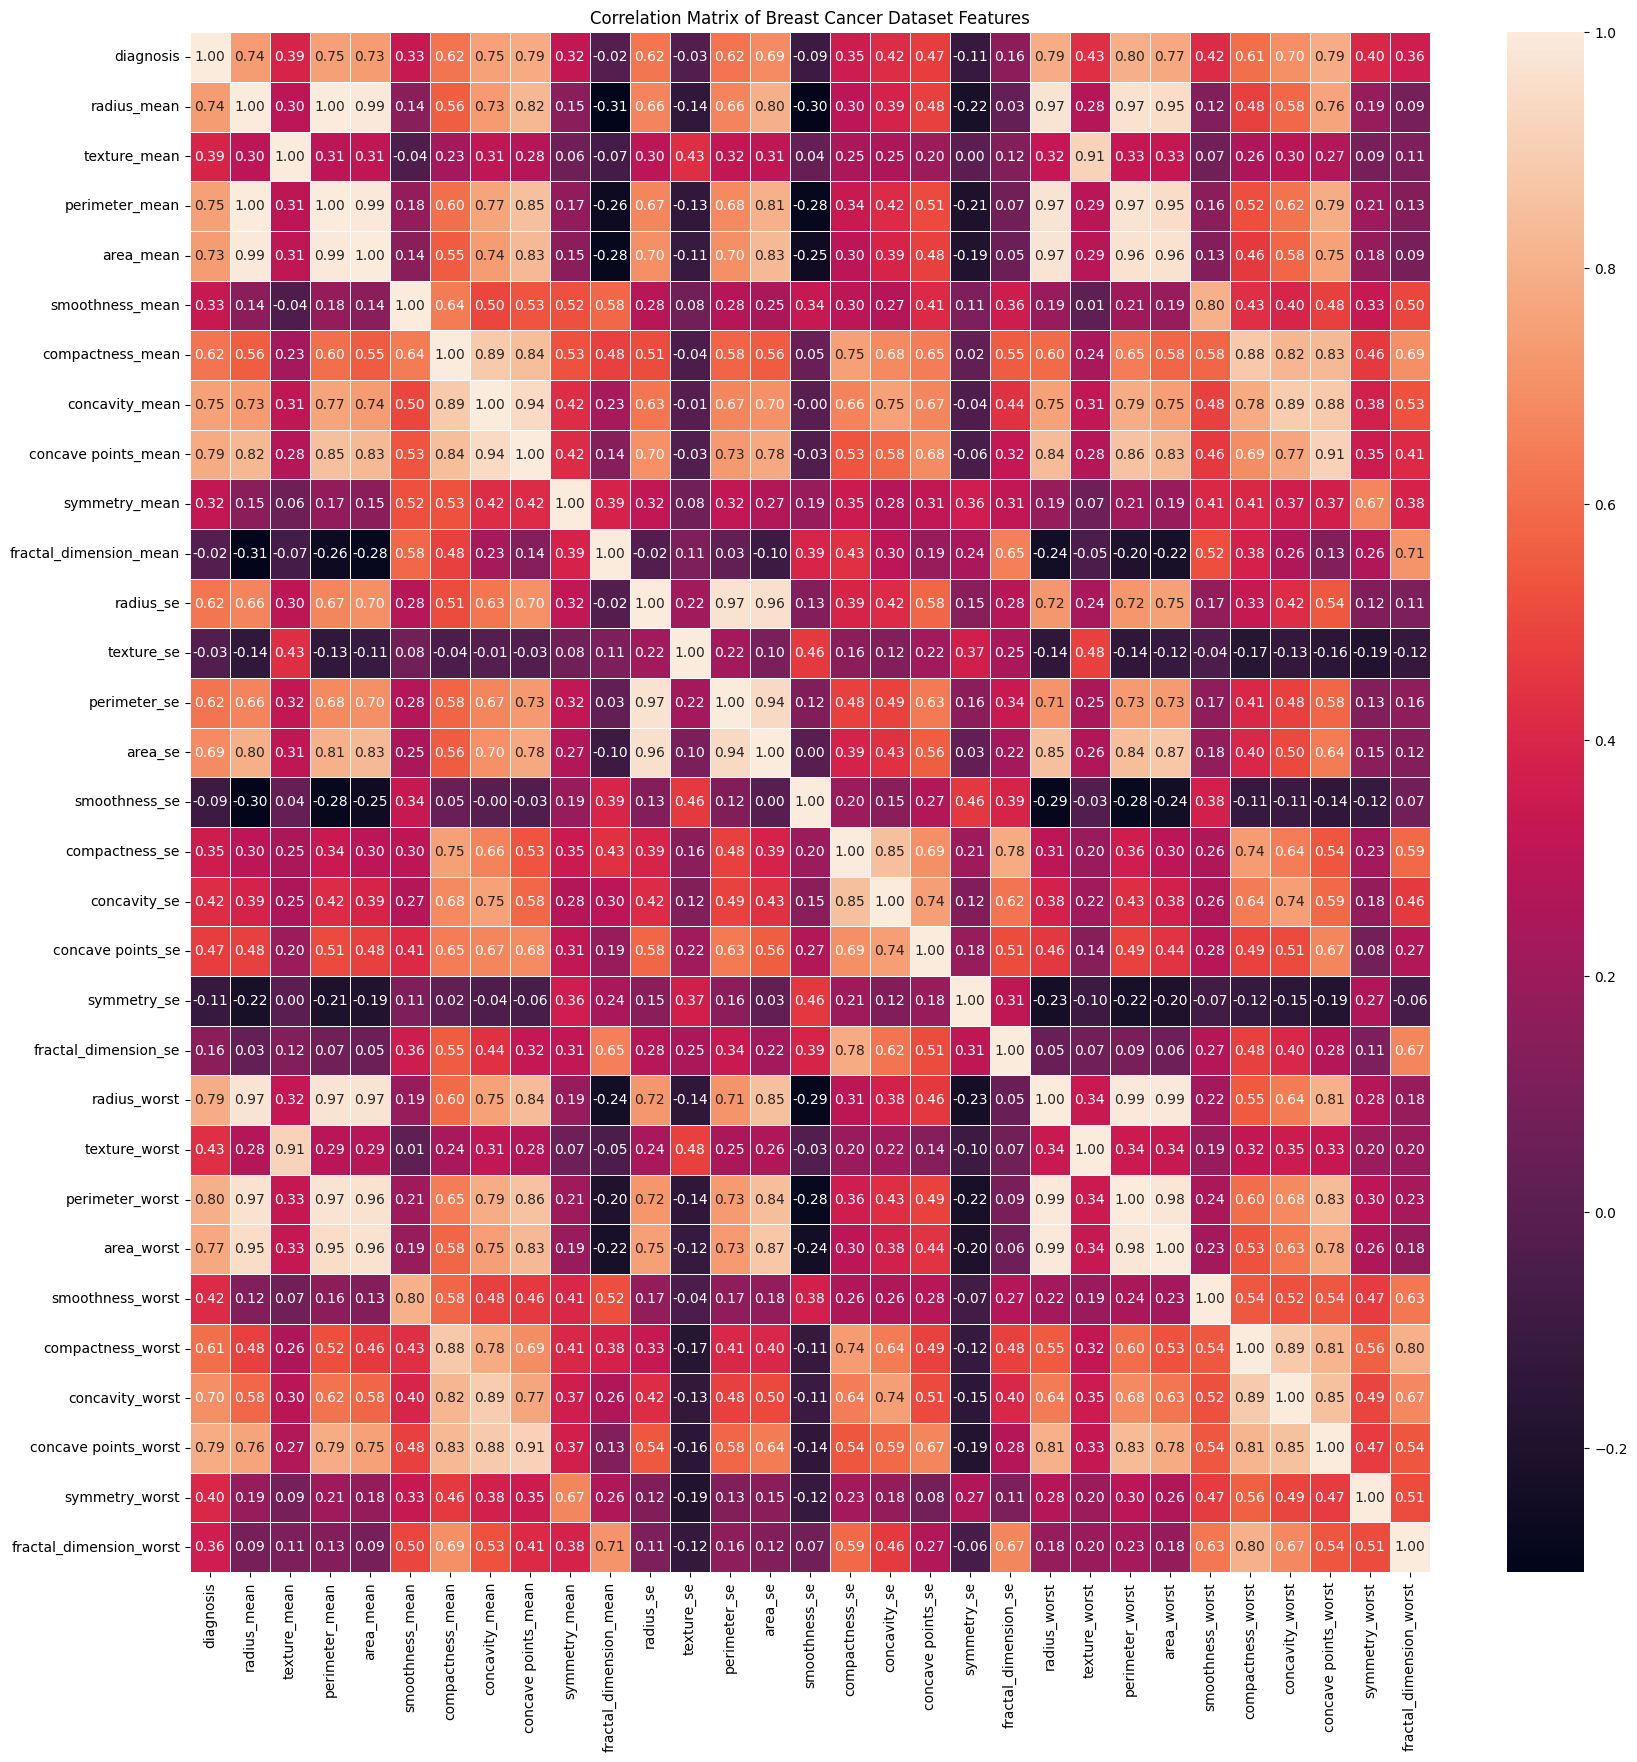

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Let's create a correlation matrix using the cleaned dataset.
correlation_matrix = data_cleaned.iloc[:,1:32].corr()


# Set up the matplotlib figure
f,ax=plt.subplots(figsize=(20,20))

# Draw the heatmap
plt.title('Correlation Matrix of Breast Cancer Dataset Features')
sns.heatmap(correlation_matrix,annot=True,linewidth=0.5,fmt='.2f',ax=ax)
plt.show()

<Axes: title={'center': 'Correlation Matrix of Breast Cancer Dataset Features'}>

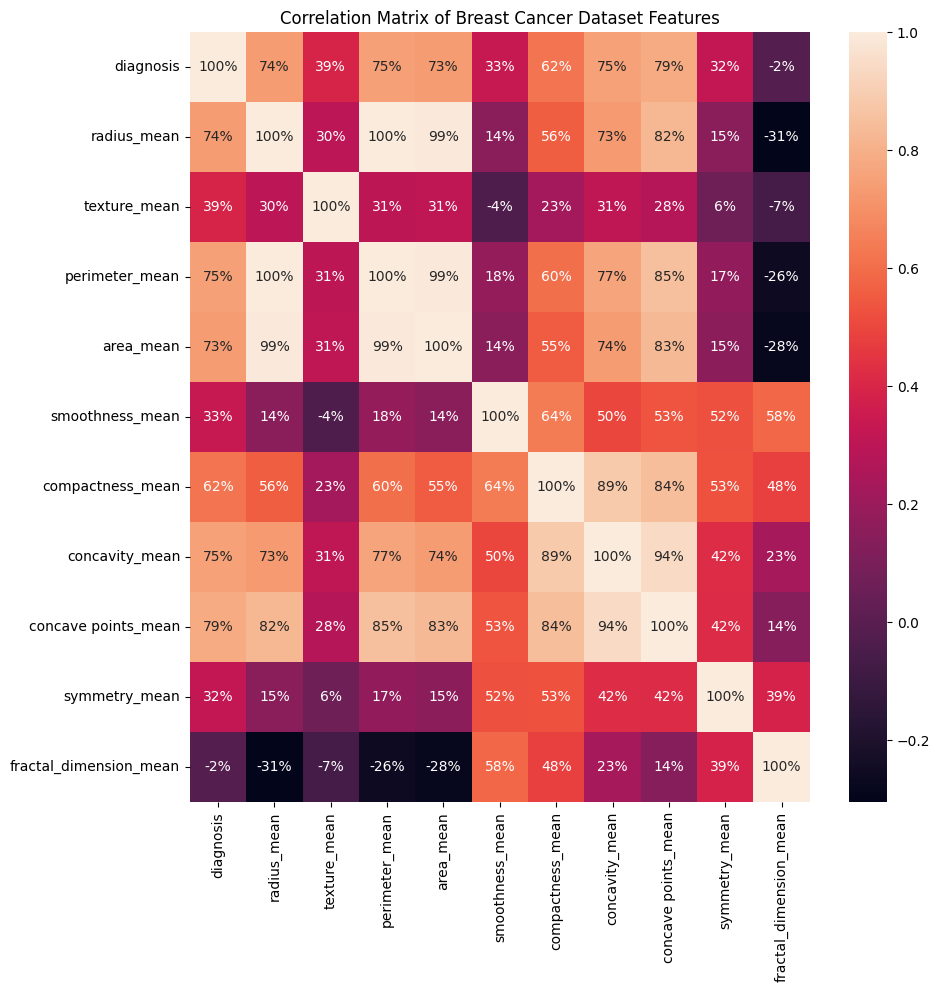

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Correlation Matrix of Breast Cancer Dataset Features')
sns.heatmap(data_cleaned.iloc[:,1:12].corr(),annot=True,fmt=".0%")

**Strong Correlation**

<Figure size 1000x800 with 0 Axes>

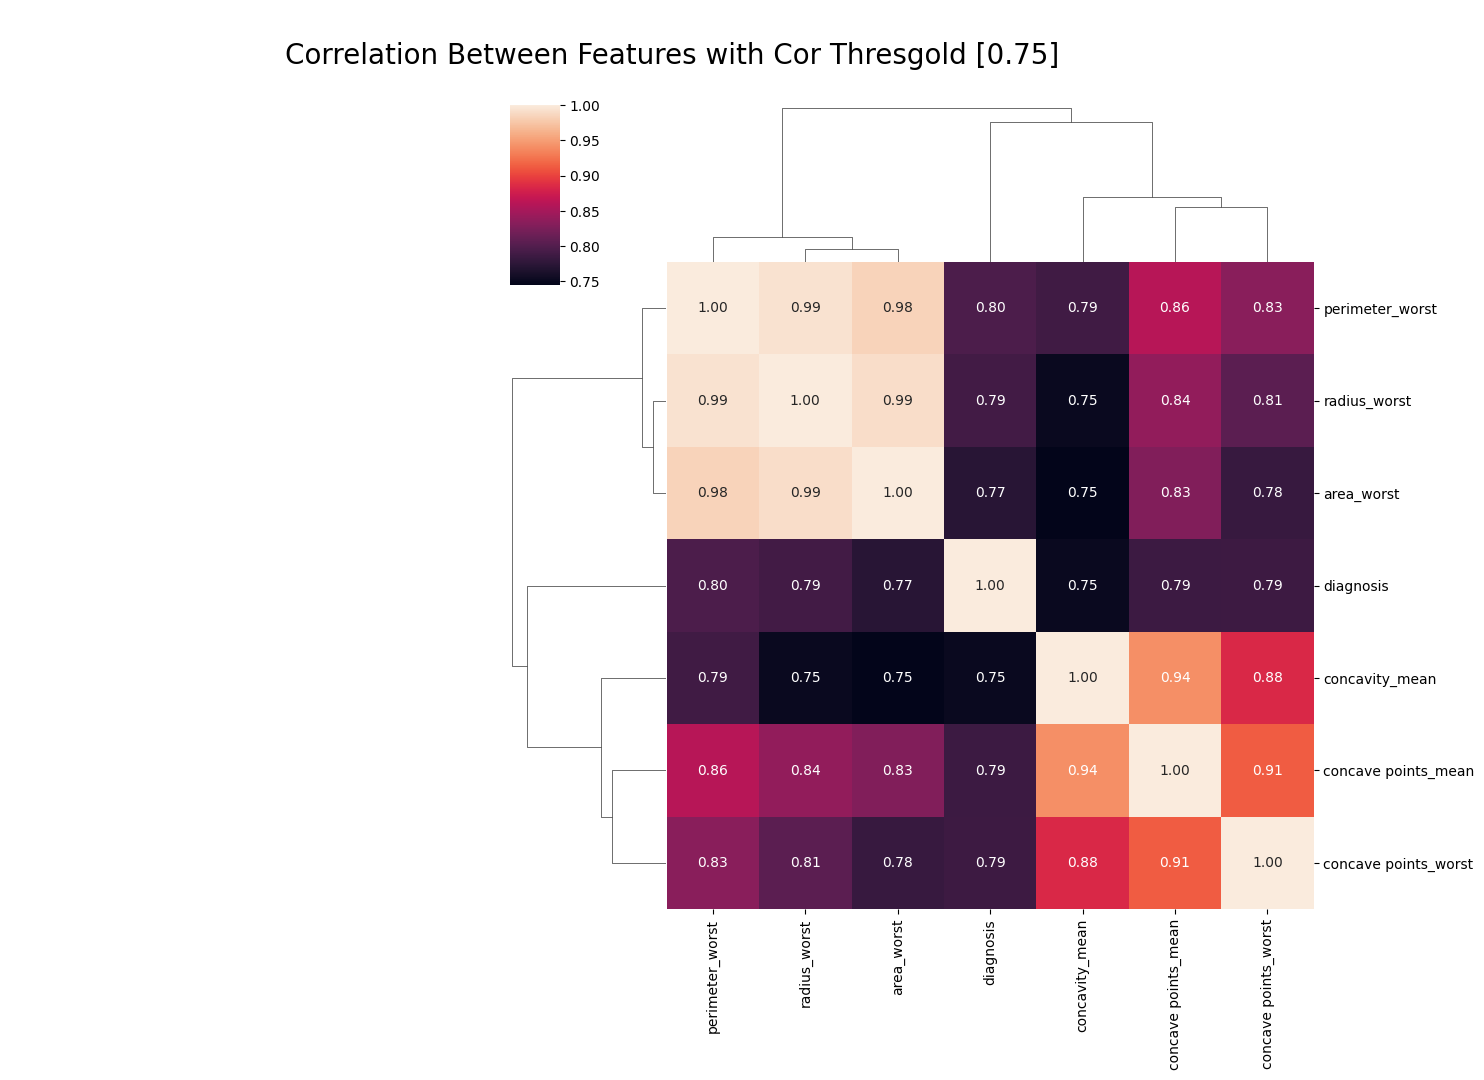

In [ ]:
threshold = 0.75
filtre = np.abs(correlation_matrix["diagnosis"] > threshold)
corr_features = correlation_matrix.columns[filtre].tolist()
plt.figure(figsize=(10,8))
sns.clustermap(data_cleaned[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("\n                               Correlation Between Features with Cor Thresgold [0.75]\n",fontsize=20)
plt.show()

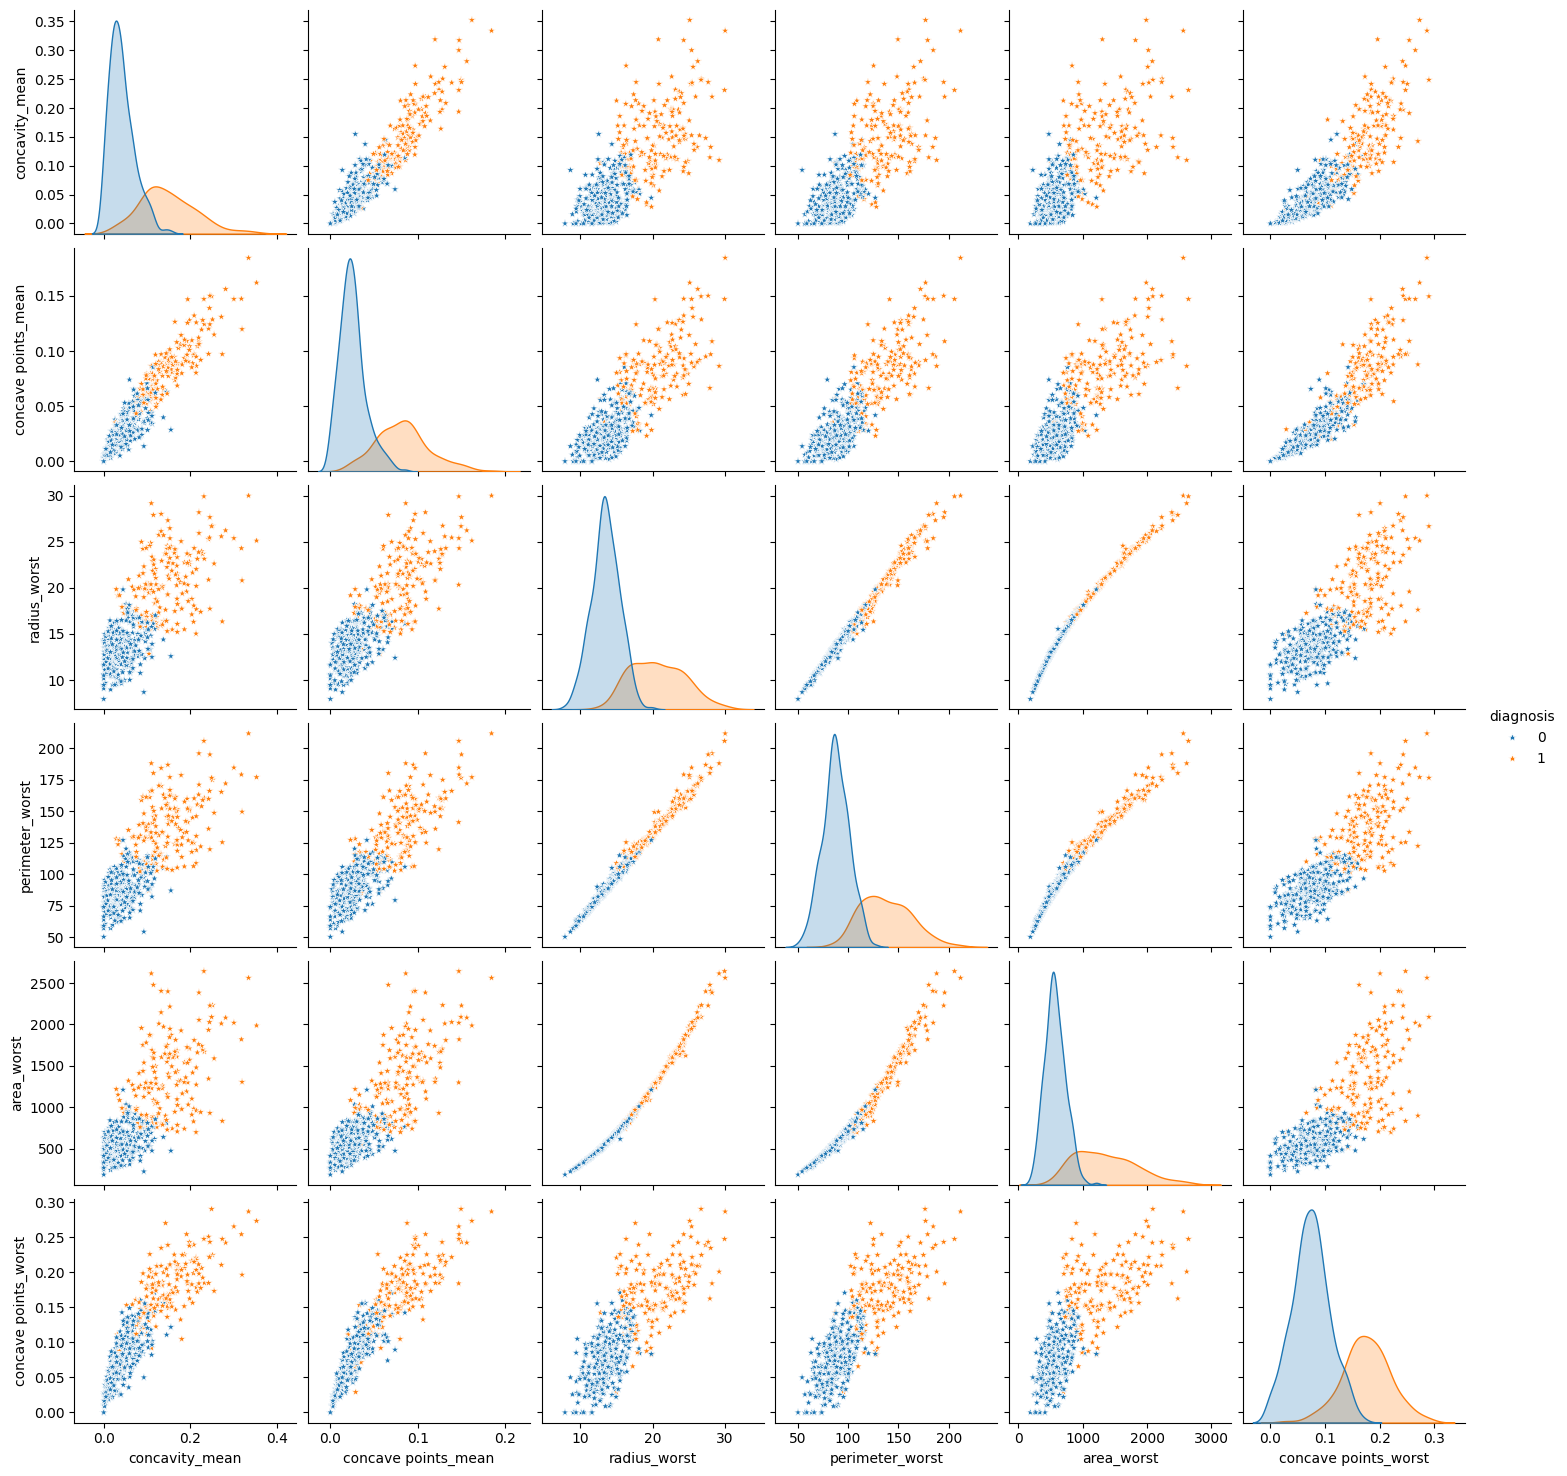

In [ ]:
sns.pairplot(data_cleaned[corr_features], diag_kind = "kde" , markers = "*", hue="diagnosis")
plt.show()

**Correlation aganist diagnosis**

In [ ]:
data_cleaned.corr()['diagnosis'].sort_values()

symmetry_se               -0.112888
smoothness_se             -0.092466
texture_se                -0.027421
fractal_dimension_mean    -0.019095
id                         0.051536
fractal_dimension_se       0.157491
symmetry_mean              0.317720
smoothness_mean            0.332885
compactness_se             0.354576
fractal_dimension_worst    0.361540
texture_mean               0.392382
symmetry_worst             0.404711
smoothness_worst           0.416676
concavity_se               0.423797
texture_worst              0.431488
concave points_se          0.473782
compactness_worst          0.605445
compactness_mean           0.618111
perimeter_se               0.619863
radius_se                  0.623964
area_se                    0.687839
concavity_worst            0.695585
area_mean                  0.734878
radius_mean                0.736114
perimeter_mean             0.749167
concavity_mean             0.751797
area_worst                 0.772215
concave points_mean        0

Data Transform

In [ ]:
# Data Transformation with StandardScaler()
from sklearn import preprocessing

# Check for Missing Data
null_ = data_cleaned.isna().any()
dtypes = data_cleaned.dtypes
info = pd.concat ([null_,dtypes], axis = 1, keys = ['Null', 'type'])
print(info) # This is different way of viewing data

std_scale = preprocessing.StandardScaler().fit_transform (data_cleaned)
scaled_frame = pd.DataFrame (std_scale, columns = data_cleaned.columns)
print (scaled_frame.head())

                          Null     type
id                       False    int64
diagnosis                False    int64
radius_mean              False  float64
texture_mean             False  float64
perimeter_mean           False  float64
area_mean                False  float64
smoothness_mean          False  float64
compactness_mean         False  float64
concavity_mean           False  float64
concave points_mean      False  float64
symmetry_mean            False  float64
fractal_dimension_mean   False  float64
radius_se                False  float64
texture_se               False  float64
perimeter_se             False  float64
area_se                  False  float64
smoothness_se            False  float64
compactness_se           False  float64
concavity_se             False  float64
concave points_se        False  float64
symmetry_se              False  float64
fractal_dimension_se     False  float64
radius_worst             False  float64
texture_worst            False  float64


In [ ]:
# Data Transformation with MinMax Scaler Method
minmax_scale = preprocessing.MinMaxScaler().fit_transform (data_cleaned)
scaled_frame = pd.DataFrame (minmax_scale, columns = data_cleaned.columns)
print (scaled_frame.head())

         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  0.009064        1.0     0.603597      0.027801        0.618667   0.494379   
1  0.009066        1.0     0.745052      0.334440        0.697753   0.681753   
2  0.916509        1.0     0.696804      0.478838        0.675045   0.610839   
3  0.917134        1.0     0.729700      0.192116        0.714979   0.665033   
4  0.009080        1.0     0.299852      0.248548        0.303657   0.192332   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.754503          0.978773        0.851831             0.797290   
1         0.368361          0.224623        0.246665             0.380325   
2         0.653551          0.532636        0.560318             0.693225   
3         0.546862          0.429914        0.562021             0.565312   
4         0.862338          0.570920        0.447914             0.438428   

   ...  radius_worst  texture_worst  perimeter_worst  ar

# Task 4
* 4.1 Convert the categorical attribute to numerical values
* 4.2. Split dataset to 80% training and 20% testing data.
* 4.3. Create a model using A (ONE) classification algorithm of your choice.
* 4.4. Visualize the model outputs, add the figures to your report, and describe
what each figure illustrates.

In [ ]:
# Checking the Number of Levels in Categorical Variable
levels = len (pd.value_counts(data_cleaned['diagnosis']))
print ('There are {} levels in the diagnosis column'.format (levels))

import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Assuming data_cleaned is your DataFrame and 'diagnosis' is the target variable
# If there are other categorical variables in data_cleaned, create dummies
df_dummies = pd.get_dummies(data_cleaned, drop_first=True)
print ('There are {} columns in df_dummies'.format (df_dummies.shape[1]))
print()

# Shuffle the DataFrame
df_shuffled = shuffle(df_dummies, random_state=42)

# Dependent variable (DV)
DV = 'diagnosis'

# Splitting the DataFrame into independent (x) and dependent (y) variables
x = df_shuffled.drop(DV, axis=1)
y = df_shuffled[DV]

# Splitting into training and testing sets (20% for testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# To verify, you can print the first few rows of the training set
print(x_train.head())

There are 2 levels in the diagnosis column
There are 32 columns in df_dummies

           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
13     848406        14.68         20.13           94.74      684.5   
492  91930402        20.47         20.67          134.70     1299.0   
403    908916        12.87         19.54           82.67      509.2   
64     859575        18.94         21.31          123.60     1130.0   
467    915452        16.30         15.70          104.70      819.8   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
13           0.09867           0.07200         0.07395              0.05259   
492          0.09156           0.13130         0.15230              0.10150   
403          0.09136           0.07883         0.01797              0.02090   
64           0.09009           0.10290         0.10800              0.07951   
467          0.09427           0.06712         0.05526              0.04563   

     symmetry_mean 

# Testing classification with LSR

In [ ]:
from sklearn.linear_model import LogisticRegression

# Creating the Logistic Regression model
model = LogisticRegression()

# Training the model
model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LSR Accuracy: 0.5588235294117647
LSR Confusion Matrix:
 [[57  0]
 [45  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      1.00      0.72        57
           1       0.00      0.00      0.00        45

    accuracy                           0.56       102
   macro avg       0.28      0.50      0.36       102
weighted avg       0.31      0.56      0.40       102



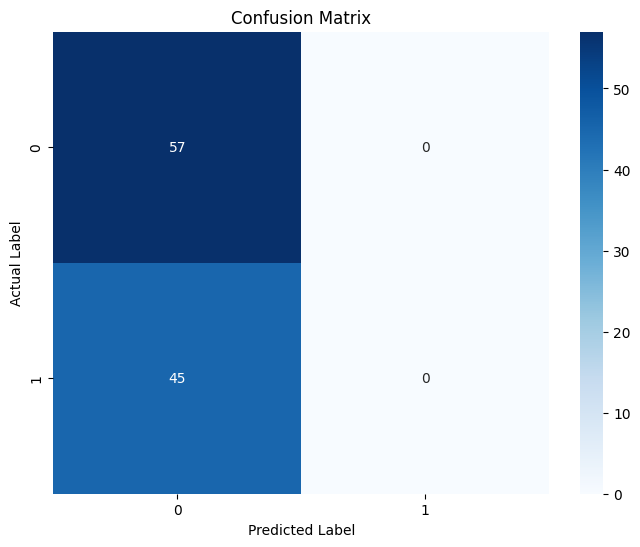

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print("LSR Accuracy:", accuracy)
print("LSR Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Testing classification with RFC

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined

# Creating the Random Forest model
rfc = RandomForestClassifier(n_estimators=50, random_state=0)

# Training the model
rfc.fit(x_train, y_train)

# Making predictions on the test set
y_pred_rf = rfc.predict(x_test)

In [ ]:
train_set_preds = rfc.predict(x_train)
test_set_preds = rfc.predict(x_test)

print('Accuracy on the training subset:(:.3f)',format(rfc.score(x_train,y_train)))
print('Accuracy on the testing subset:(:.3f)',format(rfc.score(x_test,y_test)))

Accuracy on the training subset:(:.3f) 1.0
Accuracy on the testing subset:(:.3f) 0.9313725490196079


* https://www.datacamp.com/tutorial/random-forests-classifier-python
* https://medium.com/towards-data-science/interpreting-random-forests-638bca8b49ea




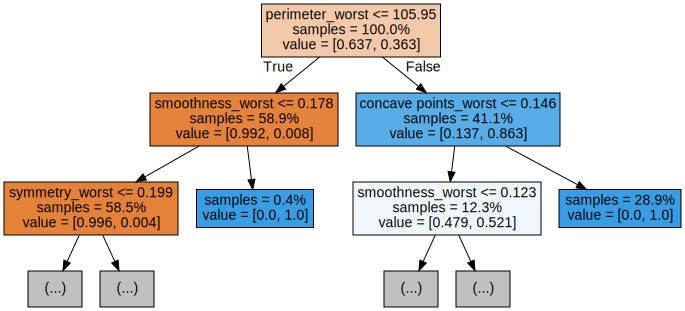

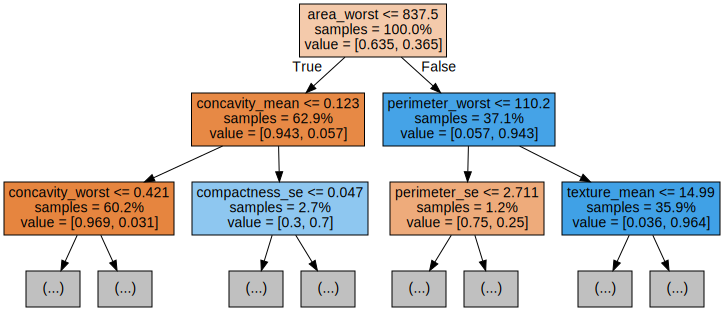

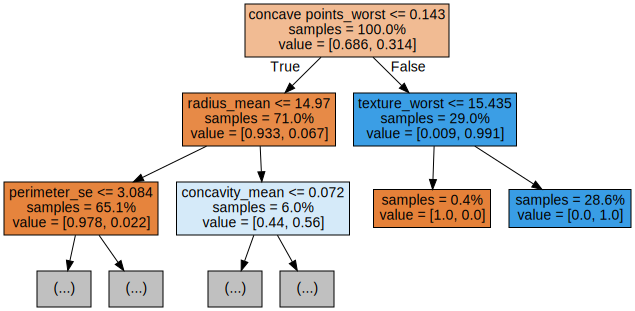

In [ ]:
# Tree Visualisation
from sklearn.tree import export_graphviz
import graphviz

# Export the first three decision trees from the forest

for i in range(3):
    tree = rfc.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

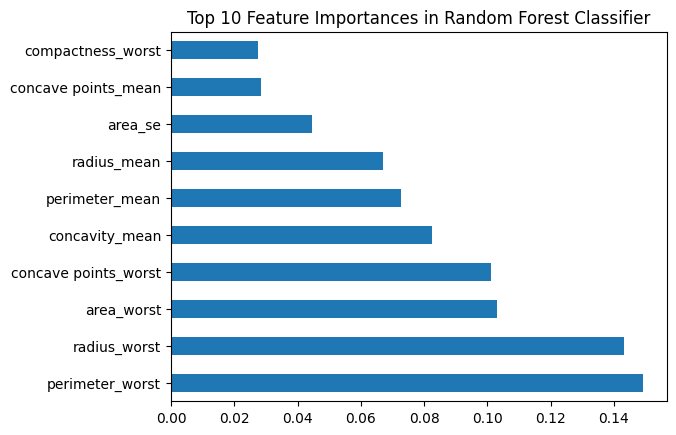

In [ ]:
feature_importances = pd.Series(rfc.feature_importances_, index=x_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances in Random Forest Classifier')
plt.show()

# Task 5
# Evaluate the model

*  Evaluate the performance of the model using at least 2 metrics.
*  Describe each metric and explain why you chose it.
*  Visualize the outputs on examining the test dataset, add the figures into your report, and describe what each figure illustrates.



**1st Metric**

Confusion Matrix https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

Random Forest Classifier Accuracy: 0.9313725490196079
Confusion Matrix:
 [[55  2]
 [ 5 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        57
           1       0.95      0.89      0.92        45

    accuracy                           0.93       102
   macro avg       0.93      0.93      0.93       102
weighted avg       0.93      0.93      0.93       102



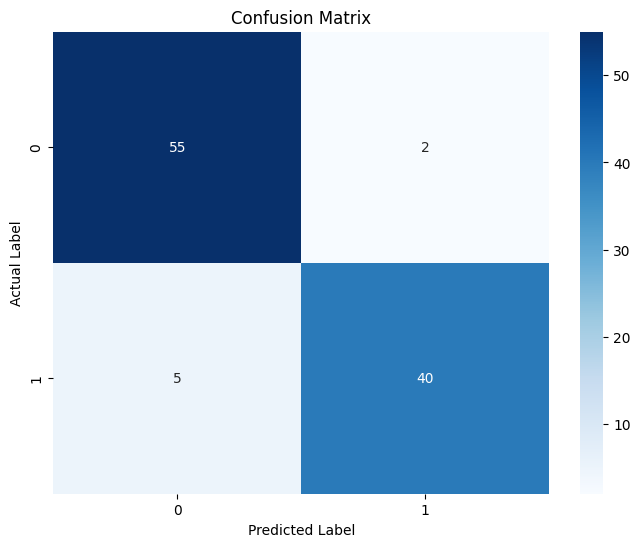

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classifier Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)

# Predictions from the model
y_pred_rf = rfc.predict(x_test)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**2nd Metric**

Accuracy , Precision , Recall

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

y_pred = rfc.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9313725490196079
Precision: 0.9523809523809523
Recall: 0.8888888888888888


In [ ]:
train_set_preds = rfc.predict(x_train)
test_set_preds = rfc.predict(x_test)

In [ ]:
print('Accuracy for test set: %0.4f' % accuracy_score(y_test, test_set_preds))
print('Accuracy for train set: %0.4f' % accuracy_score(y_train, train_set_preds))

print('\n')

print('Precision for test set: %0.4f' % precision_score(y_test, test_set_preds))
print('Precision for train set: %0.4f' % precision_score(y_train, train_set_preds))

print('\n')

print('Recall for test set: %0.4f' % recall_score(y_test, test_set_preds))
print('Recall for train set: %0.4f' % recall_score(y_train, train_set_preds))

Accuracy for test set: 0.9314
Accuracy for train set: 1.0000


Precision for test set: 0.9524
Precision for train set: 1.0000


Recall for test set: 0.8889
Recall for train set: 1.0000


**3rd Metric**

AUC and ROC Curve

In [ ]:
# Get AUC and ROC
train_preds = rfc.predict(x_train)
test_preds = rfc.predict(x_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_preds)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_preds)

train_roc_auc = auc(train_fpr, train_tpr)
test_roc_auc = auc(test_fpr, test_tpr)

print('AUC for train set: %0.4f' % train_roc_auc)
print('AUC for test set: %0.4f' % test_roc_auc)

AUC for train set: 1.0000
AUC for test set: 0.9269


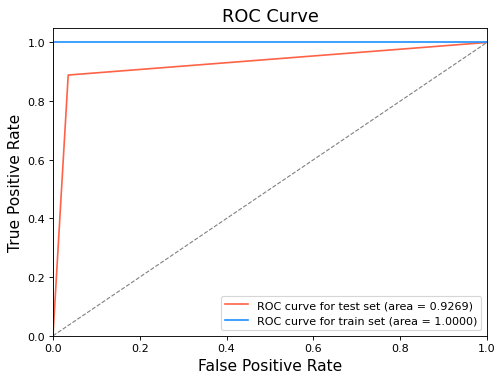

In [ ]:
# Visualize ROC curve
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(test_fpr,
         test_tpr,
         color='tomato',
         label='ROC curve for test set (area = %0.4f)' % test_roc_auc)
plt.plot(train_fpr,
         train_tpr,
         color='dodgerblue',
         label='ROC curve for train set (area = %0.4f)' % train_roc_auc)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right")

plt.show()

AUC ROC Curve https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5